In [1]:
greetings = "Ayubowan Sri Lanka!"
print(greetings)

Ayubowan Sri Lanka!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Data From CSV File

In [4]:
df=pd.read_csv('/Users/Asus/Documents/Atmel Studio/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


### Data Visualization and Analysis

In [5]:
df["custcat"].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

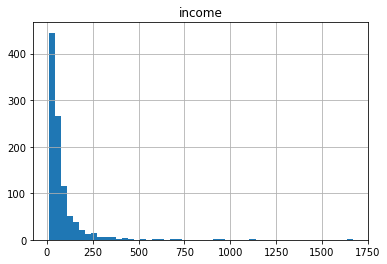

In [5]:
df.hist(column = "income", bins = 50)
plt.show()

### Feature set

In [6]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [7]:
# To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [8]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

### Normalize Data

In [9]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Train Test Split

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 4)

### K nearest neighbor (KNN)

In [12]:
# import library
from sklearn.neighbors import KNeighborsClassifier

**Train**

In [13]:
# Train
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

**Prediction**

In [17]:
# Train Set Prediction
train_predict = knn.predict(x_train)
train_predict[0:5]

array([3, 3, 3, 1, 2], dtype=int64)

In [15]:
# Test Set Prediction
test_predict = knn.predict(x_test)
test_predict[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

**Accuracy**

In [21]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, train_predict)
print("Train Set Accuracy = " + str(accuracy_train))

Train Set Accuracy = 0.5475


In [23]:
accuracy_test = accuracy_score(y_test, test_predict)
print("Test Set Accuracy = " + str(accuracy_test))

Test Set Accuracy = 0.32


**Prediction with k = 6**

In [26]:
knn6 = KNeighborsClassifier(n_neighbors = 6)
knn6.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

**Prediction**

In [27]:
# Train Set Prediction
train_predict = knn6.predict(x_train)
train_predict[0:5]

array([4, 3, 3, 1, 1], dtype=int64)

In [28]:
# Test Set Prediction
test_predict = knn6.predict(x_test)
test_predict[0:5]

array([3, 3, 3, 4, 4], dtype=int64)

**Accuracy**

In [34]:
# Accuracy
accuracy_train = accuracy_score(y_train, train_predict)
print("Train Set Accuracy = " + str(accuracy_train))

accuracy_test = accuracy_score(y_test, test_predict)
print("Test Set Accuracy = " + str(accuracy_test))

Train Set Accuracy = 0.51625
Test Set Accuracy = 0.31


**Other Ks**

In [39]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train,y_train)
    yhat = knn.predict(x_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ,
       0.33 , 0.315, 0.34 , 0.33 , 0.315, 0.34 , 0.36 , 0.355, 0.35 ,
       0.345])

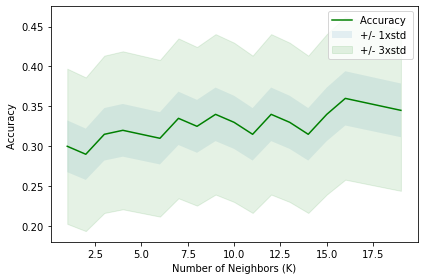

In [44]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [47]:
print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1)

The best accuracy was with 0.36 with k = 16
